## **여행지역에 따른 만족도 차이 분석**
- 여행지역에 따른 만족도 차이 비교 
- 데이터 추출
  - 국내 관광전체여행 (해외여행, 가구 국내관광여행/해외여행 없음, 기타여행, 가구 기타여행 없음, 북한여행 제외)
  - 설문지 데이터에서 응답자 번호가 없으면 전에
  - 데이터 레코드 형식 변환 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_excel("/content/drive/My Drive/응통 분석 공모전/데이터/2019 국민여행조사_국내여행.xlsx") 
data.head()

,ID,Q,QQ,MON_EXP_1,MON_EXP_2,MON_EXP_3,MON_EXP_4,MON_EXP_5,MON_EXP_6,S5,S5A_1,S5A_2,S5A_3,S5A_4,S5A_5,S5A_6,S5A_7,MON_AGO_EXP_1,MON_AGO_EXP_2,MON_AGO_EXP_3,MON_AGO_EXP_4,MON_AGO_EXP_5,MON_AGO_EXP_6,SS5,SS5A_1,SS5A_2,SS5A_3,SS5A_4,SS5A_5,SS5A_6,SS5A_7,D_TRA1_CHECK,D_TRA1_SYEAR,D_TRA1_SMONTH,D_TRA1_SDAY,D_TRA1_EYEAR,D_TRA1_EMONTH,D_TRA1_EDAY,D_TRA1_S_Day,D_TRA1_COST,...,국내_여행방문지_기타전체12,국내_여행방문지_기타전체13,국내_여행방문지_기타전체14,국내_여행방문지_기타전체15,국내_여행방문지_기타전체16,국내_여행방문지_기타전체17,국내_여행방문지_기타숙박1,국내_여행방문지_기타숙박2,국내_여행방문지_기타숙박3,국내_여행방문지_기타숙박4,국내_여행방문지_기타숙박5,국내_여행방문지_기타숙박6,국내_여행방문지_기타숙박7,국내_여행방문지_기타숙박8,국내_여행방문지_기타숙박9,국내_여행방문지_기타숙박10,국내_여행방문지_기타숙박11,국내_여행방문지_기타숙박12,국내_여행방문지_기타숙박13,국내_여행방문지_기타숙박14,국내_여행방문지_기타숙박15,국내_여행방문지_기타숙박16,국내_여행방문지_기타숙박17,국내_여행방문지_기타당일1,국내_여행방문지_기타당일2,국내_여행방문지_기타당일3,국내_여행방문지_기타당일4,국내_여행방문지_기타당일5,국내_여행방문지_기타당일6,국내_여행방문지_기타당일7,국내_여행방문지_기타당일8,국내_여행방문지_기타당일9,국내_여행방문지_기타당일10,국내_여행방문지_기타당일11,국내_여행방문지_기타당일12,국내_여행방문지_기타당일13,국내_여행방문지_기타당일14,국내_여행방문지_기타당일15,국내_여행방문지_기타당일16,국내_여행방문지_기타당일17
0,11010550341_1000000,1,0,1,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,2018.0,12.0,31.0,2019.0,1.0,1.0,1.0,2168800.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11010550341_1000005,1,0,1,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,2019.0,1.0,18.0,2019.0,1.0,20.0,2.0,280000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11010550341_1000007,2,0,1,2,2,2,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,2019.0,1.0,1.0,2019.0,1.0,3.0,2.0,345500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11010550341_1000012,1,0,1,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,2019.0,1.0,25.0,2019.0,1.0,27.0,2.0,300000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11010550341_1000013,1,0,1,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,2019.0,1.0,10.0,2019.0,1.0,13.0,3.0,1425000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
혹시몰라 = data.copy()

### 여행유형 재범주화 
- 1. 동행여행, 2. 나홀로여행, 3. 가족여행(타가구포함), 4. 가족여행 

In [ ]:
# 여행유형 재범주화 
new_data = data[['A7', 'A7B_1','A7B_2', 'A7B_3', 'A7B_4', 'A7B_5', 'A7B_6', 'A7B_7']]

In [ ]:
new_data.head()

,A7,A7B_1,A7B_2,A7B_3,A7B_4,A7B_5,A7B_6,A7B_7
0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,12.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN
2,6.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN
3,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data = data.fillna(0)

In [ ]:
# label로 범주화 해서 한 칼럼으로 만들기 
for i in range(len(data)):
  if data['A7B_2'][i] == 2.0 :
    data['A7B_1'][i] = 2.0
  elif data['A7B_3'][i] == 3.0:
    data['A7B_1'][i] = 3.0
  elif data['A7B_4'][i] == 4.0 :
    data['A7B_1'][i] = 4.0
  elif data['A7B_5'][i] == 5.0 :
    data['A7B_1'][i] = 5.0
  elif data['A7B_6'][i] == 6.0 :
    data['A7B_1'][i] = 6.0
  elif data['A7B_7'][i] == 7.0 :
    data['A7B_1'][i] = 7.0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launc

In [ ]:
# 혼자 간거면 0으로 범주화 
for i in range(len(data)):
  if data['A7'][i] == 1:
    data['A7B_1'][i] = 0

## 나머지 경우의 수 중에 nan은 제거 
data = data.dropna()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
data['A7B_1'].isna().sum() # nan없이 label로 범주화 완료 

0

In [ ]:
# 유형별로 묶기 
## 1. 동행여행, 2. 나홀로여행, 3. 가족여행(타가구포함), 4. 가족여행 
for i in range(len(data)):
  if data['A7B_1'][i] == 1.0 :
    data['A7B_1'][i] = 4
  elif data['A7B_1'][i] == 2.0 :
    data['A7B_1'][i] = 3
  elif data['A7B_1'][i] == 3.0 or data['A7B_1'][i] == 4.0 or data['A7B_1'][i] == 5.0 or data['A7B_1'][i] == 6.0 or data['A7B_1'][i] == 7.0:
    data['A7B_1'][i] = 1
  elif data['A7B_1'][i] == 0.0:
    data['A7B_1'][i] = 2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python

### 여행 방문지 칼럼 생성 : 국내관광전체여행
  - 한 사람이 여러 지역을 방문한 경우, 여러 건수로 간주하고 확인함
  - 그룹과 지역에 따른 갯수 count를 확인함 : 동행여행의 경우 강원도, 나홀로 여행의 경우 서울, 가족여행(타가구 포함)의 경우 경남, 가족여행(가구원만)의 경우 경기의 빈도가 높았음
  - 전반적 만족도 평균과 타인 추천 의향 평균을 구하여 그룹과 지역에 따른 차이를 검정했을 때 지역간의 만족도 평균 차이를 보이고 지역과 그룹의 상호작용의 효과가 있음. 

In [ ]:
# 방문 지역별, 여행 유형별 건수 확인 : count 
check = data.groupby(['국내_여행방문지_관광전체1','A7B_1']).count()['ID']

In [ ]:
check.to_csv("방문지역별_여행유형별_건수확인.csv", index = True)

In [ ]:
check = pd.read_csv("방문지역별_여행유형별_건수확인.csv")
check

,국내_여행방문지_관광전체1,A7B_1,ID
0,0.0,2.0,25371
1,11.0,1.0,504
2,11.0,2.0,147
3,11.0,3.0,19
4,11.0,4.0,352
...,...,...,...
63,38.0,4.0,1110
64,39.0,1.0,451
65,39.0,2.0,49
66,39.0,3.0,32


In [ ]:
동행여행_만족도['국내_여행방문지_관광전체1'].value_counts()

36.0    1102
32.0    1074
31.0    1055
38.0     966
37.0     917
34.0     899
35.0     786
21.0     679
11.0     504
39.0     451
33.0     398
23.0     255
22.0     168
25.0     148
26.0     130
24.0      85
29.0      49
Name: 국내_여행방문지_관광전체1, dtype: int64

In [ ]:
# 전반적 만족도 평균을 유형별로 비교 

## 각 지역별로 만족도 평균 구하기 
list1 = list()
지역 = ['seoul','busan','daegu','incheon','guangju','daejoen','ulsan','seajong',
      'gyeonggi','gangwon','chungbuk','chungnam','jeonbuk','jeonnam','geungbuk','geungnam','jeju']

동행여행_만족도 = data[data['A7B_1'] == 1]
list1.append(동행여행_만족도[동행여행_만족도['국내_여행방문지_관광전체1'] == 11.0]['A12'].mean())
list1.append(동행여행_만족도[동행여행_만족도['국내_여행방문지_관광전체1'] == 21.0]['A12'].mean())
list1.append(동행여행_만족도[동행여행_만족도['국내_여행방문지_관광전체1'] == 22.0]['A12'].mean())
list1.append(동행여행_만족도[동행여행_만족도['국내_여행방문지_관광전체1'] == 23.0]['A12'].mean())
list1.append(동행여행_만족도[동행여행_만족도['국내_여행방문지_관광전체1'] == 24.0]['A12'].mean())
list1.append(동행여행_만족도[동행여행_만족도['국내_여행방문지_관광전체1'] == 25.0]['A12'].mean())
list1.append(동행여행_만족도[동행여행_만족도['국내_여행방문지_관광전체1'] == 26.0]['A12'].mean())
list1.append(동행여행_만족도[동행여행_만족도['국내_여행방문지_관광전체1'] == 29.0]['A12'].mean())
list1.append(동행여행_만족도[동행여행_만족도['국내_여행방문지_관광전체1'] == 31.0]['A12'].mean())
list1.append(동행여행_만족도[동행여행_만족도['국내_여행방문지_관광전체1'] == 32.0]['A12'].mean())
list1.append(동행여행_만족도[동행여행_만족도['국내_여행방문지_관광전체1'] == 33.0]['A12'].mean())
list1.append(동행여행_만족도[동행여행_만족도['국내_여행방문지_관광전체1'] == 34.0]['A12'].mean())
list1.append(동행여행_만족도[동행여행_만족도['국내_여행방문지_관광전체1'] == 35.0]['A12'].mean())
list1.append(동행여행_만족도[동행여행_만족도['국내_여행방문지_관광전체1'] == 36.0]['A12'].mean())
list1.append(동행여행_만족도[동행여행_만족도['국내_여행방문지_관광전체1'] == 37.0]['A12'].mean())
list1.append(동행여행_만족도[동행여행_만족도['국내_여행방문지_관광전체1'] == 38.0]['A12'].mean())
list1.append(동행여행_만족도[동행여행_만족도['국내_여행방문지_관광전체1'] == 39.0]['A12'].mean())


나홀로여행 = data[data['A7B_1'] == 2]
list2 = list()
list2.append(나홀로여행[나홀로여행['국내_여행방문지_관광전체1'] == 11.0]['A12'].mean())
list2.append(나홀로여행[나홀로여행['국내_여행방문지_관광전체1'] == 21.0]['A12'].mean())
list2.append(나홀로여행[나홀로여행['국내_여행방문지_관광전체1'] == 22.0]['A12'].mean())
list2.append(나홀로여행[나홀로여행['국내_여행방문지_관광전체1'] == 23.0]['A12'].mean())
list2.append(나홀로여행[나홀로여행['국내_여행방문지_관광전체1'] == 24.0]['A12'].mean())
list2.append(나홀로여행[나홀로여행['국내_여행방문지_관광전체1'] == 25.0]['A12'].mean())
list2.append(나홀로여행[나홀로여행['국내_여행방문지_관광전체1'] == 26.0]['A12'].mean())
list2.append(나홀로여행[나홀로여행['국내_여행방문지_관광전체1'] == 29.0]['A12'].mean())
list2.append(나홀로여행[나홀로여행['국내_여행방문지_관광전체1'] == 31.0]['A12'].mean())
list2.append(나홀로여행[나홀로여행['국내_여행방문지_관광전체1'] == 32.0]['A12'].mean())
list2.append(나홀로여행[나홀로여행['국내_여행방문지_관광전체1'] == 33.0]['A12'].mean())
list2.append(나홀로여행[나홀로여행['국내_여행방문지_관광전체1'] == 34.0]['A12'].mean())
list2.append(나홀로여행[나홀로여행['국내_여행방문지_관광전체1'] == 35.0]['A12'].mean())
list2.append(나홀로여행[나홀로여행['국내_여행방문지_관광전체1'] == 36.0]['A12'].mean())
list2.append(나홀로여행[나홀로여행['국내_여행방문지_관광전체1'] == 37.0]['A12'].mean())
list2.append(나홀로여행[나홀로여행['국내_여행방문지_관광전체1'] == 38.0]['A12'].mean())
list2.append(나홀로여행[나홀로여행['국내_여행방문지_관광전체1'] == 39.0]['A12'].mean())


가족여행타가구 = data[data['A7B_1'] == 3]
list3 = list()
list3.append(가족여행타가구[가족여행타가구['국내_여행방문지_관광전체1'] == 11.0]['A12'].mean())
list3.append(가족여행타가구[가족여행타가구['국내_여행방문지_관광전체1'] == 21.0]['A12'].mean())
list3.append(가족여행타가구[가족여행타가구['국내_여행방문지_관광전체1'] == 22.0]['A12'].mean())
list3.append(가족여행타가구[가족여행타가구['국내_여행방문지_관광전체1'] == 23.0]['A12'].mean())
list3.append(가족여행타가구[가족여행타가구['국내_여행방문지_관광전체1'] == 24.0]['A12'].mean())
list3.append(가족여행타가구[가족여행타가구['국내_여행방문지_관광전체1'] == 25.0]['A12'].mean())
list3.append(가족여행타가구[가족여행타가구['국내_여행방문지_관광전체1'] == 26.0]['A12'].mean())
list3.append(가족여행타가구[가족여행타가구['국내_여행방문지_관광전체1'] == 29.0]['A12'].mean())
list3.append(가족여행타가구[가족여행타가구['국내_여행방문지_관광전체1'] == 31.0]['A12'].mean())
list3.append(가족여행타가구[가족여행타가구['국내_여행방문지_관광전체1'] == 32.0]['A12'].mean())
list3.append(가족여행타가구[가족여행타가구['국내_여행방문지_관광전체1'] == 33.0]['A12'].mean())
list3.append(가족여행타가구[가족여행타가구['국내_여행방문지_관광전체1'] == 34.0]['A12'].mean())
list3.append(가족여행타가구[가족여행타가구['국내_여행방문지_관광전체1'] == 35.0]['A12'].mean())
list3.append(가족여행타가구[가족여행타가구['국내_여행방문지_관광전체1'] == 36.0]['A12'].mean())
list3.append(가족여행타가구[가족여행타가구['국내_여행방문지_관광전체1'] == 37.0]['A12'].mean())
list3.append(가족여행타가구[가족여행타가구['국내_여행방문지_관광전체1'] == 38.0]['A12'].mean())
list3.append(가족여행타가구[가족여행타가구['국내_여행방문지_관광전체1'] == 39.0]['A12'].mean())


가족여행 = data[data['A7B_1'] == 4]
list4 = list()
list4.append(가족여행[가족여행['국내_여행방문지_관광전체1'] == 11.0]['A12'].mean())
list4.append(가족여행[가족여행['국내_여행방문지_관광전체1'] == 21.0]['A12'].mean())
list4.append(가족여행[가족여행['국내_여행방문지_관광전체1'] == 22.0]['A12'].mean())
list4.append(가족여행[가족여행['국내_여행방문지_관광전체1'] == 23.0]['A12'].mean())
list4.append(가족여행[가족여행['국내_여행방문지_관광전체1'] == 24.0]['A12'].mean())
list4.append(가족여행[가족여행['국내_여행방문지_관광전체1'] == 25.0]['A12'].mean())
list4.append(가족여행[가족여행['국내_여행방문지_관광전체1'] == 26.0]['A12'].mean())
list4.append(가족여행[가족여행['국내_여행방문지_관광전체1'] == 29.0]['A12'].mean())
list4.append(가족여행[가족여행['국내_여행방문지_관광전체1'] == 31.0]['A12'].mean())
list4.append(가족여행[가족여행['국내_여행방문지_관광전체1'] == 32.0]['A12'].mean())
list4.append(가족여행[가족여행['국내_여행방문지_관광전체1'] == 33.0]['A12'].mean())
list4.append(가족여행[가족여행['국내_여행방문지_관광전체1'] == 34.0]['A12'].mean())
list4.append(가족여행[가족여행['국내_여행방문지_관광전체1'] == 35.0]['A12'].mean())
list4.append(가족여행[가족여행['국내_여행방문지_관광전체1'] == 36.0]['A12'].mean())
list4.append(가족여행[가족여행['국내_여행방문지_관광전체1'] == 37.0]['A12'].mean())
list4.append(가족여행[가족여행['국내_여행방문지_관광전체1'] == 38.0]['A12'].mean())
list4.append(가족여행[가족여행['국내_여행방문지_관광전체1'] == 39.0]['A12'].mean())

In [ ]:
print(len(list1), len(list2), len(list3), len(list4))

17 17 17 17


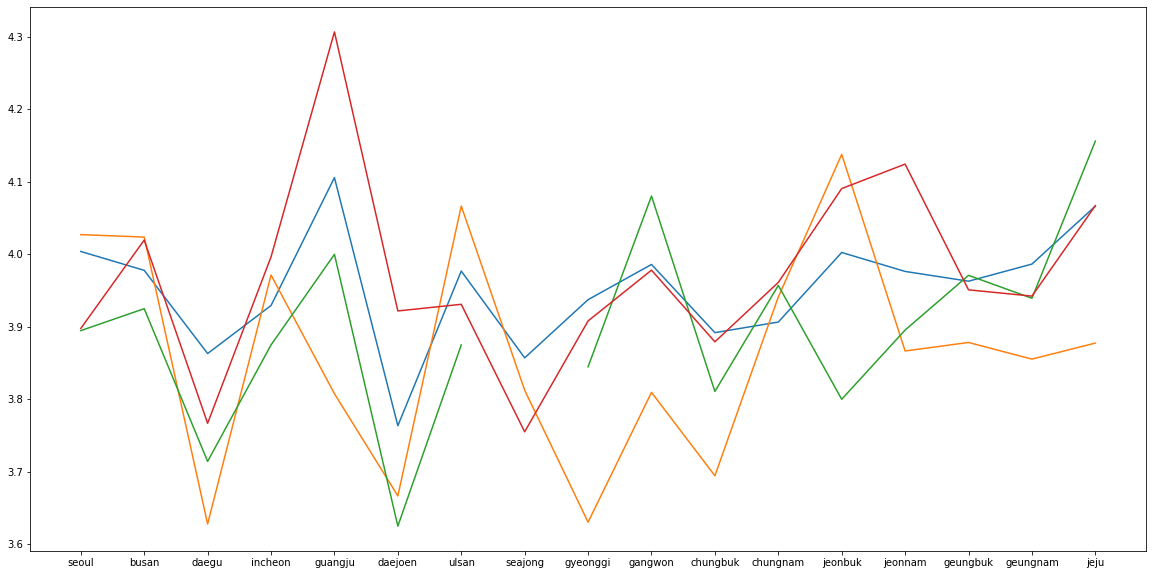

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(지역,list1) # 여행유형, 지역별로 확인 

plt.plot(지역,list2)
plt.plot(지역,list3)
plt.plot(지역,list4)
#plt.figure(figsize=(20, 40))

In [ ]:
# 유의미한 차이 검정 

## anova 
from scipy.stats import f_oneway
fstat, pval = f_oneway(data[data['A7B_1'] == 1]['A12'] , data[data['A7B_1'] == 2]['A12'], data[data['A7B_1'] == 3]['A12'], data[data['A7B_1'] == 4]['A12'])
print(fstat)
print(pval)

148976.45646095354
0.0


In [ ]:
# 타인 추천의향 평균을 유형별로 비교 

# 전반적 만족도 평균을 유형별로 비교 

## 각 지역별로 만족도 평균 구하기 
list1 = list()
지역 = ['seoul','busan','daegu','incheon','guangju','daejoen','ulsan','seajong',
      'gyeonggi','gangwon','chungbuk','chungnam','jeonbuk','jeonnam','geungbuk','geungnam','jeju']

동행여행_만족도 = data[data['A7B_1'] == 1]
list1.append(동행여행_만족도[동행여행_만족도['국내_여행방문지_관광전체1'] == 11.0]['A14'].mean())
list1.append(동행여행_만족도[동행여행_만족도['국내_여행방문지_관광전체1'] == 21.0]['A14'].mean())
list1.append(동행여행_만족도[동행여행_만족도['국내_여행방문지_관광전체1'] == 22.0]['A14'].mean())
list1.append(동행여행_만족도[동행여행_만족도['국내_여행방문지_관광전체1'] == 23.0]['A14'].mean())
list1.append(동행여행_만족도[동행여행_만족도['국내_여행방문지_관광전체1'] == 24.0]['A14'].mean())
list1.append(동행여행_만족도[동행여행_만족도['국내_여행방문지_관광전체1'] == 25.0]['A14'].mean())
list1.append(동행여행_만족도[동행여행_만족도['국내_여행방문지_관광전체1'] == 26.0]['A14'].mean())
list1.append(동행여행_만족도[동행여행_만족도['국내_여행방문지_관광전체1'] == 29.0]['A14'].mean())
list1.append(동행여행_만족도[동행여행_만족도['국내_여행방문지_관광전체1'] == 31.0]['A14'].mean())
list1.append(동행여행_만족도[동행여행_만족도['국내_여행방문지_관광전체1'] == 32.0]['A14'].mean())
list1.append(동행여행_만족도[동행여행_만족도['국내_여행방문지_관광전체1'] == 33.0]['A14'].mean())
list1.append(동행여행_만족도[동행여행_만족도['국내_여행방문지_관광전체1'] == 34.0]['A14'].mean())
list1.append(동행여행_만족도[동행여행_만족도['국내_여행방문지_관광전체1'] == 35.0]['A14'].mean())
list1.append(동행여행_만족도[동행여행_만족도['국내_여행방문지_관광전체1'] == 36.0]['A14'].mean())
list1.append(동행여행_만족도[동행여행_만족도['국내_여행방문지_관광전체1'] == 37.0]['A14'].mean())
list1.append(동행여행_만족도[동행여행_만족도['국내_여행방문지_관광전체1'] == 38.0]['A14'].mean())
list1.append(동행여행_만족도[동행여행_만족도['국내_여행방문지_관광전체1'] == 39.0]['A14'].mean())


나홀로여행 = data[data['A7B_1'] == 2]
list2 = list()
list2.append(나홀로여행[나홀로여행['국내_여행방문지_관광전체1'] == 11.0]['A14'].mean())
list2.append(나홀로여행[나홀로여행['국내_여행방문지_관광전체1'] == 21.0]['A14'].mean())
list2.append(나홀로여행[나홀로여행['국내_여행방문지_관광전체1'] == 22.0]['A14'].mean())
list2.append(나홀로여행[나홀로여행['국내_여행방문지_관광전체1'] == 23.0]['A14'].mean())
list2.append(나홀로여행[나홀로여행['국내_여행방문지_관광전체1'] == 24.0]['A14'].mean())
list2.append(나홀로여행[나홀로여행['국내_여행방문지_관광전체1'] == 25.0]['A14'].mean())
list2.append(나홀로여행[나홀로여행['국내_여행방문지_관광전체1'] == 26.0]['A14'].mean())
list2.append(나홀로여행[나홀로여행['국내_여행방문지_관광전체1'] == 29.0]['A14'].mean())
list2.append(나홀로여행[나홀로여행['국내_여행방문지_관광전체1'] == 31.0]['A14'].mean())
list2.append(나홀로여행[나홀로여행['국내_여행방문지_관광전체1'] == 32.0]['A14'].mean())
list2.append(나홀로여행[나홀로여행['국내_여행방문지_관광전체1'] == 33.0]['A14'].mean())
list2.append(나홀로여행[나홀로여행['국내_여행방문지_관광전체1'] == 34.0]['A14'].mean())
list2.append(나홀로여행[나홀로여행['국내_여행방문지_관광전체1'] == 35.0]['A14'].mean())
list2.append(나홀로여행[나홀로여행['국내_여행방문지_관광전체1'] == 36.0]['A14'].mean())
list2.append(나홀로여행[나홀로여행['국내_여행방문지_관광전체1'] == 37.0]['A14'].mean())
list2.append(나홀로여행[나홀로여행['국내_여행방문지_관광전체1'] == 38.0]['A14'].mean())
list2.append(나홀로여행[나홀로여행['국내_여행방문지_관광전체1'] == 39.0]['A14'].mean())


가족여행타가구 = data[data['A7B_1'] == 3]
list3 = list()
list3.append(가족여행타가구[가족여행타가구['국내_여행방문지_관광전체1'] == 11.0]['A14'].mean())
list3.append(가족여행타가구[가족여행타가구['국내_여행방문지_관광전체1'] == 21.0]['A14'].mean())
list3.append(가족여행타가구[가족여행타가구['국내_여행방문지_관광전체1'] == 22.0]['A14'].mean())
list3.append(가족여행타가구[가족여행타가구['국내_여행방문지_관광전체1'] == 23.0]['A14'].mean())
list3.append(가족여행타가구[가족여행타가구['국내_여행방문지_관광전체1'] == 24.0]['A14'].mean())
list3.append(가족여행타가구[가족여행타가구['국내_여행방문지_관광전체1'] == 25.0]['A14'].mean())
list3.append(가족여행타가구[가족여행타가구['국내_여행방문지_관광전체1'] == 26.0]['A14'].mean())
list3.append(가족여행타가구[가족여행타가구['국내_여행방문지_관광전체1'] == 29.0]['A14'].mean())
list3.append(가족여행타가구[가족여행타가구['국내_여행방문지_관광전체1'] == 31.0]['A14'].mean())
list3.append(가족여행타가구[가족여행타가구['국내_여행방문지_관광전체1'] == 32.0]['A14'].mean())
list3.append(가족여행타가구[가족여행타가구['국내_여행방문지_관광전체1'] == 33.0]['A14'].mean())
list3.append(가족여행타가구[가족여행타가구['국내_여행방문지_관광전체1'] == 34.0]['A14'].mean())
list3.append(가족여행타가구[가족여행타가구['국내_여행방문지_관광전체1'] == 35.0]['A14'].mean())
list3.append(가족여행타가구[가족여행타가구['국내_여행방문지_관광전체1'] == 36.0]['A14'].mean())
list3.append(가족여행타가구[가족여행타가구['국내_여행방문지_관광전체1'] == 37.0]['A14'].mean())
list3.append(가족여행타가구[가족여행타가구['국내_여행방문지_관광전체1'] == 38.0]['A14'].mean())
list3.append(가족여행타가구[가족여행타가구['국내_여행방문지_관광전체1'] == 39.0]['A14'].mean())


가족여행 = data[data['A7B_1'] == 4]
list4 = list()
list4.append(가족여행[가족여행['국내_여행방문지_관광전체1'] == 11.0]['A14'].mean())
list4.append(가족여행[가족여행['국내_여행방문지_관광전체1'] == 21.0]['A14'].mean())
list4.append(가족여행[가족여행['국내_여행방문지_관광전체1'] == 22.0]['A14'].mean())
list4.append(가족여행[가족여행['국내_여행방문지_관광전체1'] == 23.0]['A14'].mean())
list4.append(가족여행[가족여행['국내_여행방문지_관광전체1'] == 24.0]['A14'].mean())
list4.append(가족여행[가족여행['국내_여행방문지_관광전체1'] == 25.0]['A14'].mean())
list4.append(가족여행[가족여행['국내_여행방문지_관광전체1'] == 26.0]['A14'].mean())
list4.append(가족여행[가족여행['국내_여행방문지_관광전체1'] == 29.0]['A14'].mean())
list4.append(가족여행[가족여행['국내_여행방문지_관광전체1'] == 31.0]['A14'].mean())
list4.append(가족여행[가족여행['국내_여행방문지_관광전체1'] == 32.0]['A14'].mean())
list4.append(가족여행[가족여행['국내_여행방문지_관광전체1'] == 33.0]['A14'].mean())
list4.append(가족여행[가족여행['국내_여행방문지_관광전체1'] == 34.0]['A14'].mean())
list4.append(가족여행[가족여행['국내_여행방문지_관광전체1'] == 35.0]['A14'].mean())
list4.append(가족여행[가족여행['국내_여행방문지_관광전체1'] == 36.0]['A14'].mean())
list4.append(가족여행[가족여행['국내_여행방문지_관광전체1'] == 37.0]['A14'].mean())
list4.append(가족여행[가족여행['국내_여행방문지_관광전체1'] == 38.0]['A14'].mean())
list4.append(가족여행[가족여행['국내_여행방문지_관광전체1'] == 39.0]['A14'].mean())

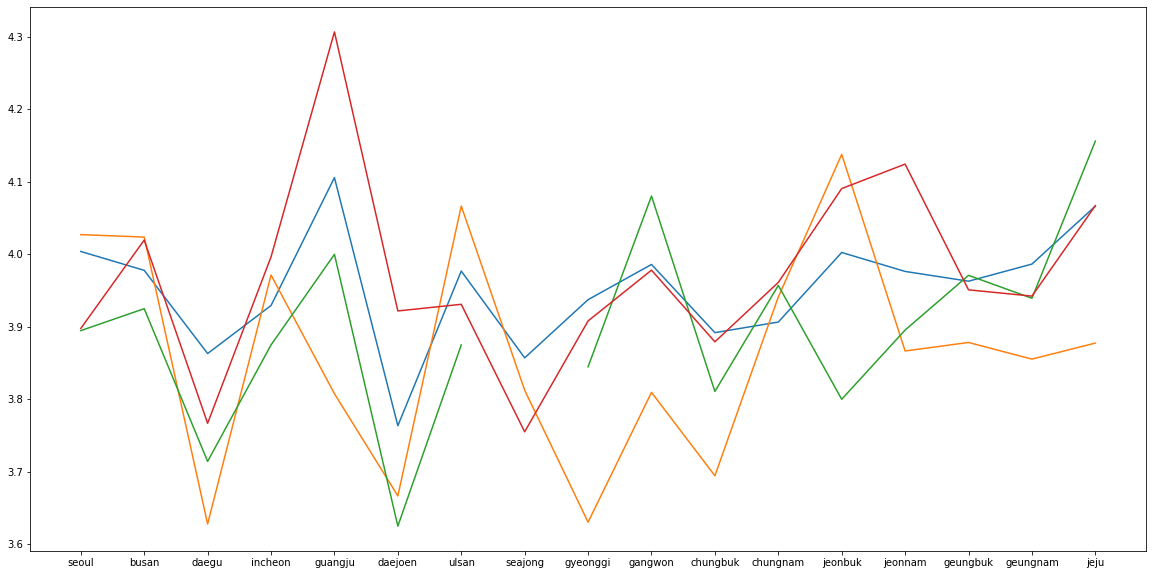

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(지역,list1) # 여행유형, 지역별로 확인 
plt.plot(지역,list2)
plt.plot(지역,list3)
plt.plot(지역,list4)

In [ ]:
# 유의미한 차이 검정 

## anova 
fstat, pval = f_oneway(data[data['A7B_1'] == 1]['A14'] , data[data['A7B_1'] == 2]['A14'], data[data['A7B_1'] == 3]['A14'], data[data['A7B_1'] == 4]['A14'])
print(fstat)
print(pval)

141157.37233992698
0.0


### 그룹별 여행지역(특정지역선정)에 따른 만족도 평균의 차이 비교 
  - 특정지역 선정 기준 : '여행지 활동'의 비중이 높은 5개의 지역을 선정 : 부산, 강원, 전북, 경북, 제주 
  - 부산 및 전북이 다른 그룹에 비해 만족도 높음
  - 강원(휴식/휴양)에서는 단체여행을 이용한 가족여행이 다른 그룹에 비해 만족도 높음 
  - 전반적으로 만족도가 높은 제주를 제외하고, 나홀로 여행보다 다른 유형의 여행의 만족도가 높을 것 같은 부산, 전북이 나홀로 여행의 만족도가 가장 높음 

In [ ]:
data['A3_5'].tail(20)

48249    0.0
48250    0.0
48251    0.0
48252    0.0
48253    0.0
48254    0.0
48255    0.0
48256    0.0
48257    0.0
48258    0.0
48259    0.0
48260    5.0
48261    0.0
48262    0.0
48263    0.0
48264    0.0
48265    0.0
48266    0.0
48267    0.0
48268    0.0
Name: A3_5, dtype: float64

In [ ]:
# 여행활동 col생성
data['A3_1'] = data['A3_1'] + data['A3_2'] + data['A3_3'] + data['A3_4'] + data['A3_5'] + data['A3_6'] + data['A3_7'] + data['A3_8'] + data['A3_9'] + data['A3_10'] + data['A3_11'] + data['A3_12'] + data['A3_13'] + data['A3_14'] + data['A3_15'] + data['A3_16'] + data['A3_17'] + data['A3_18'] + data['A3_19'] + data['A3_20'] + data['A3_21']

In [ ]:
# 특정지역에 따른 각 활동에 따른 만족도 비교 
check = data.groupby(['국내_여행방문지_관광전체1','A3_1']).count()['ID']

In [ ]:
check.to_csv('특별지역별_활동갯수.csv', index = True)

In [ ]:
check = pd.read_csv("특별지역별_활동갯수.csv")
check.head()

,국내_여행방문지_관광전체1,A3_1,ID
0,0.0,0.0,25371
1,11.0,1.0,32
2,11.0,2.0,21
3,11.0,3.0,23
4,11.0,4.0,6


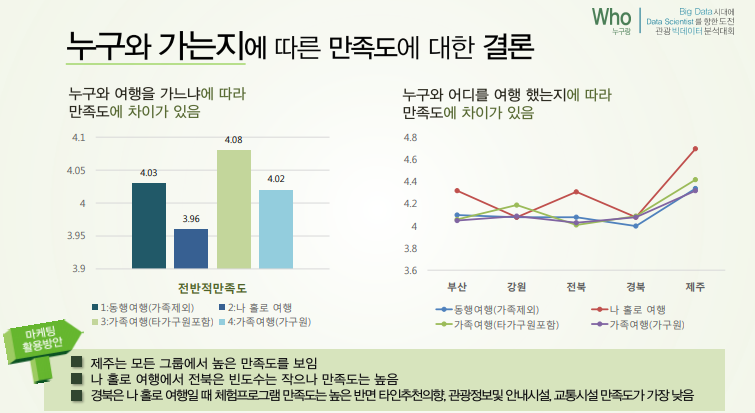